# **Atividade 4 - K-MEANS E PCA**


# **BIBLIOTECAS**


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import seaborn as sns
import pylab as pl
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#**Função acurácia**

In [ ]:
def f_acuracia(y_true, y_predict):
  y_true_size = y_true.shape[0]
  media_das_acuracia = (np.sum(y_true == y_predict) / y_true_size)
  return media_das_acuracia

#**K-Fould**

In [ ]:

def k_fold(x, y, k, classificador):
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)
  
  #DEFININDOP OS INDICES
  x = x[indices]
  y = y[indices]

  #TAMANHO DAS ENTRADAS
  x_size = x.shape[0]
  y_size = y.shape[0]

  #o tamanho de cada subset da nossa lista de índices
  size = len(indices)
  subset_size = round(x_size / k)

  x_subsets = [x[i:i + subset_size, :] for i in range(0, x_size, subset_size)]
  y_subsets = [y[i:i + subset_size] for i in range(0, y_size, subset_size)]

  #GUARDAR OS VALORES DE ACURACIA DE CADA EVENTO
  lista_train = []
  lista_test = []

  for i in range(k):

      #definindo os valores de subset para lista
      x_test = x_subsets[i]
      y_test = y_subsets[i]

      #lista em que cada elemento dela será um dos subsets da lista indices.
      x_train = np.array([])
      y_train = np.array([])
     
     #dividindo os dados para criar k folds
      for j in range(k):
          if i != j:
              x_train = np.append(x_train, x_subsets[j])
              
              y_train = np.append(y_train, y_subsets[j])
          x_train = x_train.reshape(y_train.shape[0], x.shape[1])

      #Treinando e Predizendo os valores
      classificador.fit(x_train, y_train)
      y_test_pred = classificador.predict(x_test)
      y_train_pred = classificador.predict(x_train)

      #Calculando as Acurácias 
      acuracia_test =  f_acuracia(y_test, y_test_pred)
      acuracia_train = f_acuracia(y_train, y_train_pred)

      #Guardando os valores das Acurácias para fazer a média.
      lista_train = np.append(lista_train , acuracia_train)
      lista_test =  np.append(lista_test  , acuracia_test)

      print("---------------- - UTILIZANDO K-FOLD - ----------------")
      print("----------------- {}º INTERAÇÃO -----------------".format(i+1))
      print('ACURACIA DE TREINO: {}'.format(acuracia_train))
      print('ACURACIA DE TESTE: {}'.format(acuracia_test))

  print('\n')
  print("----------------- ACURACIA GERAL -----------------")
  print('ACURACIA GERAL DE TREINO: {}'.format(lista_train.mean()))
  print('ACURACIA GERAL DE TESTE: {}'.format(lista_test.mean()))





#**Árvore de Decisão**

In [ ]:
class NosArvores:
    def __init__(self, data, feature):
        self.feature = feature
        self.value = data
        self.left = None
        self.right = None

class ArvoredeDecisao():
    def __init__(self):
        self._estimator_type = "classifier"

    def cont_unico(self, y):
        (unique, counts) = np.unique(y, return_counts=True)
        frequency = {}
        for i in range(len(unique)):
            frequency[unique[i]] = counts[i]
        return frequency

    def calculate_gini(self, X, y, feature, valor):
        x = X[:, feature]
        left = {
            'total': 0
        }
        right = {
            'total': 0
        }
        


#**K-means** 

In [ ]:
class Kmeans():
    def __init__(self, k):
        self._k = k
    
    def distancia_euclidiana(self, x1, y2):
        x = np.sqrt(((x1 - y2)**2).sum())
        return x

    def at_grupo(self, X):
        
        self.classes = {}
        for i in range(self._k):
            self.classes[i] = np.zeros(X.shape[1])

        for x in X:
            distances = np.array([self.distancia_euclidiana(x, centroid) for centroid in self.centroids])
            label = np.argmin(distances)
            self.classes[label] = np.vstack((self.classes[label], x))

    def c_centroids(self, X):
       
        anterior = self.centroids
        isOptimal = False
        while(not isOptimal):    
            countDifferents = 0
            for label in self.classes:
                self.centroids[label] = np.average(self.classes[label], axis = 0)

                if(not (anterior[label] == self.centroids[label]).all()):
                    countDifferents += 1

            if(countDifferents == 0):
                isOptimal = True

            if(not isOptimal):
                self.at_grupo(X)


    def fit(self, X):
        
        self.centroids = np.empty((self._k, X.shape[1]), float)
        for i in range(self._k):
            self.centroids[i] = np.array([np.random.randint(np.min(X[:, j]), np.max(X[:, j])) for j in range(X.shape[1])])

        self.at_grupo(X)
        self.c_centroids(X)

    def predict(self, X):
        
        self.class_distance = np.array([])
        predicted = np.array([])
        
        for x in X:
            distancias = np.array([self.distancia_euclidiana(x, centroid) for centroid in self.centroids])
            label = np.argmin(distancias)
            self.class_distance = np.append(self.class_distance,np.min(distancias))
            predicted = np.append(predicted, label)

        return predicted



#**PCA** 




In [ ]:
class PCA():
    def __init__(self, n):
        self._n = n

    def c_covarianca(self, X):
        n = X.shape[0]
        x = ((X - np.mean(X, axis=0)).T @ (X - np.mean(X, axis=0))) / (n - 1)
        return x
    
    def fit(self, X):
       
        X = StandardScaler().fit_transform(X)
        covarianca = self.c_covarianca(X)
        values, vectors = np.linalg.eig(covarianca)
        
        indices = (-values).argsort()[:self._n]
        self.w = vectors[:, indices]
        self.variance = np.array([])

        for i in indices:
            self.variance = np.append(self.variance, values[i] / values.sum())


    def transform(self, X):
       
        X = StandardScaler().fit_transform(X)
        Y = (self.w.T @ X.T).T
        return Y

#**Carregando Dados**

In [ ]:
data = np.loadtxt("Dados/trab4.data", delimiter=",")
x = data[:, 0:2]
y = data[:, 2]






#**RESULTADOS**


O K-means:
Os valores 3 e 4 são bons para k. Já que om o valor com k=4 o modelo conseguiu se adequou bem. Já com k = 3, também se adequou bem.

---------------- - UTILIZANDO K-means - ----------------




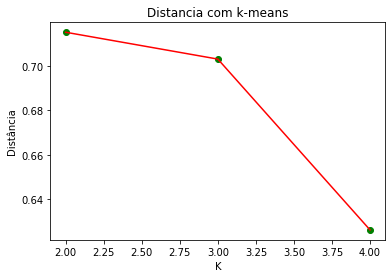

---------------- - UTILIZANDO PCA - ----------------


variância preservada: 1.0


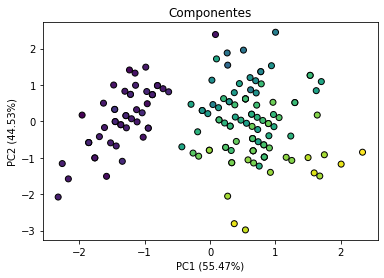

In [ ]:
print("---------------- - UTILIZANDO K-means - ----------------")
print('\n')

m_distancia = np.array([])
for k in range(2, 5):
    distance = 0
    for _ in range(10):
        kmeans = Kmeans(k)
        kmeans.fit(x)
        kmeans.predict(x)
        distance += kmeans.class_distance.mean()
    m_distancia = np.append(m_distancia, distance/10)

plt.scatter(range(2,5), m_distancia, color='green')
plt.plot(range(2,5), m_distancia, color='red')

plt.title("Distancia com k-means")
plt.xlabel("K")
plt.ylabel("Distância")
plt.show()

#AD = ArvoredeDecisao
#k_fold(x, y, 5, AD)


print("---------------- - UTILIZANDO PCA - ----------------")
print('\n')
pca = PCA(2)
pca.fit(x)
x = pca.transform(x)
print("variância preservada: {}".format(pca.variance.sum()))

plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k')
plt.title("Componentes")
plt.xlabel('PC1 ({:.2f}%)'.format(pca.variance[0] * 100))
plt.ylabel('PC2 ({:.2f}%)'.format(pca.variance[1] * 100))
plt.show()
